In [7]:
import pandas as pd

# Load test dataset with specified encoding
test = pd.read_csv("/Users/arup/Documents/BAS/train_new.csv", encoding='latin1')

# Print the loaded data
test

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


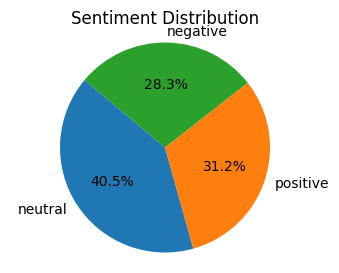

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = test['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 3))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [9]:
test_data = test[['text','sentiment']]

test_data

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [10]:
test_data.dtypes

text         object
sentiment    object
dtype: object

In [11]:
# Convert column 'text' to strings
test_data['text'] = test_data['text'].astype(str)

test_data

/var/folders/lw/mxt4vf712k5_lslhrjcqqj700000gn/T/ipykernel_12782/443147253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['text'] = test_data['text'].astype(str)


,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [12]:
test_data.dtypes

text         object
sentiment    object
dtype: object

In [13]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function for data preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove non-alphanumeric characters and URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text

# Apply preprocessing to the 'text' column of the test dataset
test_data['preprocessed_text'] = test_data['text'].apply(preprocess_text)

# Display the preprocessed data
test_data

/var/folders/lw/mxt4vf712k5_lslhrjcqqj700000gn/T/ipykernel_12782/1240832281.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['preprocessed_text'] = test_data['text'].apply(preprocess_text)


,text,sentiment,preprocessed_text
0,"I`d have responded, if I were going",neutral,responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad miss san diego
2,my boss is bullying me...,negative,bos bullying
3,what interview! leave me alone,negative,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,son put release already bought
...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,wish could come see u denver husband lost job ...
27477,I`ve wondered about rake to. The client has ...,negative,wondered rake client made clear net force devs...
27478,Yay good for both of you. Enjoy the break - y...,positive,yay good enjoy break probably need hectic week...
27479,But it was worth it ****.,positive,worth


In [7]:
from afinn import Afinn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Assuming the preprocessed text column is named "preprocessed_text"
texts = test_data['preprocessed_text']
labels = test_data['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Feature extraction using AFINN
afinn = Afinn()

def afinn_features(text):
    return [afinn.score(word) for word in text.split()]

In [8]:
# Use TF-IDF vectorizer to convert text data to numerical features
vectorizer = TfidfVectorizer(tokenizer=afinn_features, lowercase=False)

# Initialize Support Vector Classifier
svc_classifier = SVC(kernel='linear')

# Combine AFINN features and SVC into a single pipeline
model = make_pipeline(vectorizer, svc_classifier)

# Train the model
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(lowercase=False,
                                 tokenizer=<function afinn_features at 0x3062e1620>)),
                ('svc', SVC(kernel='linear'))])

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.6770965981444425
Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.62      0.66      1562
     neutral       0.65      0.70      0.67      2230
    positive       0.69      0.70      0.70      1705

    accuracy                           0.68      5497
   macro avg       0.68      0.67      0.68      5497
weighted avg       0.68      0.68      0.68      5497



In [10]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    'svc__C': [0.1, 1, 10],  # Regularization parameter
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/

Best Parameters: {'svc__C': 10, 'tfidfvectorizer__ngram_range': (1, 1)}
Best Score: 0.6706693268199448


In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Get the best parameters
best_params = {'svc__C': 10, 'tfidfvectorizer__ngram_range': (1, 1)}

# Initialize a new model with the best parameters
best_model = make_pipeline(TfidfVectorizer(tokenizer=afinn_features, lowercase=False, ngram_range=best_params['tfidfvectorizer__ngram_range']), SVC(kernel='linear', C=best_params['svc__C']))

# Train the model on the entire training dataset
best_model.fit(texts, labels)

# Make predictions on the test set
y_pred_test = best_model.predict(X_test)

# Evaluate performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)

print("Test Set Performance:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:")
print(report_test)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Test Set Performance:
Accuracy: 0.6783700200109151
Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.63      0.66      1562
     neutral       0.66      0.69      0.67      2230
    positive       0.69      0.71      0.70      1705

    accuracy                           0.68      5497
   macro avg       0.68      0.68      0.68      5497
weighted avg       0.68      0.68      0.68      5497



In [12]:
from pyswarm import pso

# Define the fitness function
def fitness_function(hyperparameters):
    # Extract hyperparameters
    tfidf_ngram_range = (1, int(hyperparameters[0]))
    svc_C = hyperparameters[1]
    
    # Build and train the model with the given hyperparameters
    model = make_pipeline(TfidfVectorizer(tokenizer=afinn_features, lowercase=False, ngram_range=tfidf_ngram_range), SVC(kernel='linear', C=svc_C))
    model.fit(X_train, y_train)
    
    # Evaluate model performance
    accuracy = accuracy_score(y_test, model.predict(X_test))
    
    return -accuracy  # Minimize negative accuracy

# Define the search space
lb = [1, 0.1]  # Lower bounds for ngram_range and C
ub = [2, 10]   # Upper bounds for ngram_range and C

# Perform PSO optimization
best_hyperparameters, _ = pso(fitness_function, lb, ub, swarmsize=10, maxiter=50)

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/

Stopping search: maximum iterations reached --> 50
Best Hyperparameters: [1.1879854  2.07461117]


In [13]:
# Extract best hyperparameters
best_tfidf_ngram_range = (1, int(best_hyperparameters[0]))
best_svc_C = best_hyperparameters[1]

# Build the final model with the best hyperparameters
best_model = make_pipeline(TfidfVectorizer(tokenizer=afinn_features, lowercase=False, ngram_range=best_tfidf_ngram_range), SVC(kernel='linear', C=best_svc_C))

# Train the final model on the entire training dataset
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = best_model.predict(X_test)

# Evaluate performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)

print("Test Set Performance:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:")
print(report_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Test Set Performance:
Accuracy: 0.6798253592868837
Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.63      0.66      1562
     neutral       0.66      0.69      0.68      2230
    positive       0.69      0.70      0.70      1705

    accuracy                           0.68      5497
   macro avg       0.68      0.68      0.68      5497
weighted avg       0.68      0.68      0.68      5497

